In [2]:
# Load dataset and normalize [0,1]

import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

C:\Users\User\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\anaconda3\envs\deeplearning\lib\site-pack

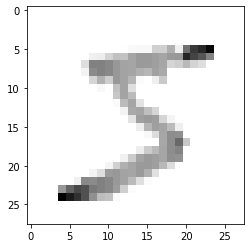

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [4]:
# Build a CNN Model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Reshape data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [7]:
# One hot encode labels
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# Fit model
model.fit(x_train, y_train, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.2622 - accuracy: 0.9238
Epoch 2/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.1064 - accuracy: 0.9674
Epoch 3/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0719 - accuracy: 0.9777
Epoch 4/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0526 - accuracy: 0.9833
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0405 - accuracy: 0.9869
Epoch 6/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0323 - accuracy: 0.9893
Epoch 7/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0248 - accuracy: 0.9914
Epoch 8/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0217 - accuracy: 0.9926
Epoch 9/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0165 - accuracy: 0.9942
Epoch 10/10
60000/60000 [=============================

In [9]:
# Evaluate model
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 27us/step
0.10974870599570022 0.9746000170707703


In [10]:
# Save model
model.save("num_classifier.model")

In [11]:
# Load model
from tensorflow.keras.models import load_model

new_model = load_model("num_classifier.model")

In [14]:
# Predictions
predictions = new_model.predict([x_test])
print(predictions)

[[2.2228105e-12 1.5723628e-15 1.2832873e-13 ... 1.0000000e+00
  8.7906350e-15 2.9596718e-09]
 [3.3468840e-14 1.1206674e-04 9.9988794e-01 ... 9.7256578e-11
  4.4985030e-15 4.1977807e-18]
 [1.7197180e-13 9.9999928e-01 4.7003024e-09 ... 6.8716048e-08
  6.4417003e-07 5.5647657e-11]
 ...
 [2.1503275e-17 5.0195990e-11 1.2114352e-17 ... 1.1829838e-10
  2.0135059e-10 4.3857845e-08]
 [9.8890444e-11 1.0463825e-12 1.4340464e-15 ... 2.4527234e-12
  2.9207524e-07 4.0029337e-15]
 [1.8077193e-11 8.5201757e-15 2.8170086e-14 ... 1.6593804e-20
  6.6723377e-11 7.5478279e-14]]


In [19]:
# Get first prediction
import numpy as np

print(np.argmax(predictions[0]))

7


In [20]:
# Reshape data
x_test = x_test.reshape(10000, 28, 28)

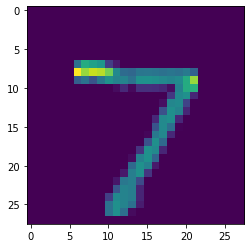

In [21]:
# Show first image
plt.imshow(x_test[0])
plt.show()